# Web Scraping Using Python + Data Cleaning + Data Analysis & Visualization

## Gathering Python Libraries & URL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#To Open URLs
from urllib.request import urlopen
#To extract data from html files
from bs4 import BeautifulSoup

In [3]:
#Get html of the page
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [4]:
#Parse html into Python Objects
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
#Let's print the contents of soup
print(soup)

<!DOCTYPE html>
<html>
<head>
<meta content="Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!" property="og:title"/>
<meta content="Results of the 2017 Intel Great Place to Run \ Urban Clash Games at Hillsboro Stadium in Hillsboro, OR." property="og:description"/>
<meta content="http://www.hubertiming.com/results/2017GPTRForResults.jpg" property="og:image"/>
<meta content="http://www.hubertiming.com/results/2017GPTR10K" property="og:url"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>
<!-- Latest compiled and minified CSS as of 2/10/2015 -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.1/css/bootstrap.min.css" integrity="sha384-WskhaSGFgHYWDcbwN70/dfYBj47jz9qbsMId/iRN3ewGhXQFZCSftd1LZCfmhktB" rel="stylesheet"/>
<link href="https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css" rel="stylesheet"/>
<l

## Web Scrapping Starts

In [6]:
#Get the Title
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [7]:
#Print out the text
text = soup.get_text()
print(text)








2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results






        @media print {
            .noprint {
                display: none;
            }

            .dataTables_filter {
                display: none;
            }
        }
        #individualResults tbody tr {
            cursor: pointer;
        }
        .video-container {
            position: relative;
            padding-bottom: 56.25%; /* 16:9 */
            padding-top: 25px;
            height: 0;
        }
        .video-container iframe {
            position: absolute;
            top: 0;
            left: 0;
            width: 100%;
            height: 100%;
        }
        .dataTables_wrapper .dataTables_paginate {
            float: right;
            text-align: right;
            padding-top: 0.25em;
        }
        .dataTables_wrapper .dataTables_paginate .paginate_button {
                box-sizing: border-box;
                display: inline-block;
                min-width: 

In [8]:
#Finding all important tags viz 'a', 'table'
soup.find_all('a')

[<a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a href="http://hubertiming.com/">Huber Timing Home</a>,
 <a href="#individual">Individual Results</a>,
 <a href="#team">Team Results</a>,
 <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="#tabs-1" style="font-size: 18px">Results</a>,
 <a name="individual"></a>,
 <a name="team"></a>,
 <a href="http://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="http://facebook.com/hubertiming/"><img src="/results/FB-f-Logo__blue_50.png"/></a>]

In [9]:
soup.find_all('table')

[<table align="right">
 <tbody>
 <tr><td>Finishers:</td><td>577</td></tr>
 <tr><td>Male:</td><td>414</td></tr>
 <tr><td>Female:</td><td>163</td></tr>
 </tbody>
 </table>,
 <table class="table table-striped table-bordered table-hover ht-table" id="individualResults" style="padding: 3px">
 <thead>
 <tr class="header">
 <th>Place</th>
 <th>Bib</th>
 <th>Name</th>
 <th>Gender</th>
 <th>City</th>
 <th>State</th>
 <th>Chip Time</th>
 <th>Chip Pace</th>
 <th>Gender Place</th>
 <th>Age Group</th>
 <th>Age Group Place</th>
 <th>Time to Start</th>
 <th>Gun Time</th>
 <th>Team</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>1</td>
 <td>814</td>
 <td>JARED WILSON</td>
 <td>M</td>
 <td>TIGARD</td>
 <td>OR</td>
 <td>00:36:21</td>
 <td>05:51</td>
 <td>1 of 414</td>
 <td>M 36-45</td>
 <td>1 of 152</td>
 <td>00:00:03</td>
 <td>00:36:24</td>
 <td></td>
 </tr>
 <tr>
 <td>2</td>
 <td>573</td>
 <td>NATHAN A SUSTERSIC</td>
 <td>M</td>
 <td>PORTLAND</td>
 <td>OR</td>
 <td>00:36:42</td>
 <td>05:55</td>
 <td>2 of 41

In [10]:
#Get href attributes within each a
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

/results/2017GPTR
http://hubertiming.com/
#individual
#team
mailto:timing@hubertiming.com
#tabs-1
None
None
http://www.hubertiming.com/
http://facebook.com/hubertiming/


In [11]:
#Print the first 10 rows of tables for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr>
<td>1</td>
<td>814</td>
<td>JARED WILSON</td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>00:36:21</td>
<td>05:51</td>
<td>1 of 414</td>
<td>M 36-45</td>
<td>1 of 152</td>
<td>00:00:03</td>
<td>00:36:24</td>
<td></td>
</tr>, <tr>
<td>2</td>
<td>573</td>
<td>NATHAN A SUSTERSIC</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>00:36:42</td>
<td>05:55</td>
<td>2 of 414</td>
<td>M 26-35</td>
<td>1 of 154</td>
<td>00:00:03</td>
<td>00:36:45</td>
<td>INTEL TEAM F</td>
</tr>, <tr>
<td>3</td>
<td>687</td>
<td>FRANCISCO MAYA</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>00:37:44</td>
<td>06:05</td>
<td

<em>Goal:</em> To take a table from a webpage and convert it into a dataframe for easier manipulation using Python.
<em>Step1:</em>Get all the table rows in list form.
<em>Step2:</em>Convert them into a dataframe.

In [12]:
#Loop iterating through table rows and printing out the cells of the rows
for row in rows:
    row_td = row.find_all()
print(row_td)
type(row_td)

[<td>14TH</td>, <td>INTEL TEAM M</td>, <td>04:43:23</td>, <td>00:58:59 - DANIELLE CASILLAS</td>, <td>01:02:06 - RAMYA MERUVA</td>, <td>01:17:06 - PALLAVI J SHINDE</td>, <td>01:25:11 - NALINI MURARI</td>]


bs4.element.ResultSet

You'll notice that ouput also contains HTML tags <td> and </td> along with the element but this is not we want. Let's remove them to get the required dataframe!

### Method 1: Let's convert each element into a string then, use Beautiful Soup's Parser to remove tags and only get the text.

In [13]:
rows_new = soup.find_all('tr')
#print(rows_new)
list_rows_new = []

for row_new in rows_new:
    row_td_new = row_new.find_all('td')
    str_cells_new = str(row_td_new)
    cleantext = BeautifulSoup(str_cells_new, "lxml").get_text()
    list_rows_new.append(cleantext)
print(list_rows_new)

['[Finishers:, 577]', '[Male:, 414]', '[Female:, 163]', '[]', '[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21, 05:51, 1 of 414, M 36-45, 1 of 152, 00:00:03, 00:36:24, ]', '[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, 00:36:42, 05:55, 2 of 414, M 26-35, 1 of 154, 00:00:03, 00:36:45, INTEL TEAM F]', '[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:37:44, 06:05, 3 of 414, M 46-55, 1 of 64, 00:00:04, 00:37:48, ]', '[4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:34, 06:13, 4 of 414, M 36-45, 2 of 152, 00:00:03, 00:38:37, ]', '[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00:39:21, 06:20, 5 of 414, M 26-35, 2 of 154, 00:00:03, 00:39:24, INTEL TEAM F]', '[6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39:49, 06:25, 6 of 414, M 18-25, 1 of 34, 00:00:06, 00:39:55, ]', '[7, 144, GEORGE TOTONCHY, M, PORTLAND, OR, 00:40:04, 06:27, 7 of 414, M 36-45, 3 of 152, 00:00:13, 00:40:17, ]', '[8, 395, BENJAMIN C CHAFFIN, M, PORTLAND, OR, 00:40:05, 06:27, 8 of 414, M 36-45, 4 of 152, 00:00:04, 00:40:09, ]', '[9, 7, 

<b><em> We have successfully a comma-separated list which needs to be converted into a dataframe.</em></b>

In [14]:
df = pd.DataFrame(list_rows_new)
df.head(10)

,0
0,"[Finishers:, 577]"
1,"[Male:, 414]"
2,"[Female:, 163]"
3,[]
4,"[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21..."
5,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
6,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:3..."
7,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:..."
8,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00..."
9,"[6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39..."


<b><em> Successfully retrieved the Dataframe.</em></b>

### Method 2: Using Regular Expressions
<b>Step1:</b> Compile a regular expression by passing a string to match to <em>re.compile()</em>. The dot, star, and question mark (.*?) will match an opening angle bracket followed by anything and followed by a closing angle bracket.

It matches the shortest possible string. If you omit the question mark, it will match all the text between the first opening angle bracket and the last closing angle bracket.

<b>Step2:</b> After compiling a regular expression, you can use the re.sub() method to find all the substrings where the regular expression matches and replace them with an empty string. 

<b>Step3:</b> The full code below generates an empty list, extract text in between html tags for each row, and append it to the assigned list.

In [15]:
import re

rows = soup.find_all('tr')

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(list_rows)
type(list_rows)

['[Finishers:, 577]', '[Male:, 414]', '[Female:, 163]', '[]', '[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21, 05:51, 1 of 414, M 36-45, 1 of 152, 00:00:03, 00:36:24, ]', '[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, 00:36:42, 05:55, 2 of 414, M 26-35, 1 of 154, 00:00:03, 00:36:45, INTEL TEAM F]', '[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:37:44, 06:05, 3 of 414, M 46-55, 1 of 64, 00:00:04, 00:37:48, ]', '[4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:34, 06:13, 4 of 414, M 36-45, 2 of 152, 00:00:03, 00:38:37, ]', '[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00:39:21, 06:20, 5 of 414, M 26-35, 2 of 154, 00:00:03, 00:39:24, INTEL TEAM F]', '[6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39:49, 06:25, 6 of 414, M 18-25, 1 of 34, 00:00:06, 00:39:55, ]', '[7, 144, GEORGE TOTONCHY, M, PORTLAND, OR, 00:40:04, 06:27, 7 of 414, M 36-45, 3 of 152, 00:00:13, 00:40:17, ]', '[8, 395, BENJAMIN C CHAFFIN, M, PORTLAND, OR, 00:40:05, 06:27, 8 of 414, M 36-45, 4 of 152, 00:00:04, 00:40:09, ]', '[9, 7, 

list

<b><em> We have successfully a comma-separated list which needs to be converted into a dataframe.</em></b>

In [16]:
#Convert cleantext or list_rows into a Dataframe using Pandas.
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,"[Finishers:, 577]"
1,"[Male:, 414]"
2,"[Female:, 163]"
3,[]
4,"[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21..."
5,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
6,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:3..."
7,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:..."
8,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00..."
9,"[6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39..."


<b><em> Successfully retrieved the Dataframe.</em></b>

### Data Manipulation And Cleaning

The Dataframe is not in the format that we want.<br>
<b>Step 1:</b> To split '[]' into multiple columns at the comma position.<br>
<b>Step 2:</b> To remove the brackets '[]', persisting in the first and last column elements respectively.<br>
<b>Step 3:</b> To make a Table Header.<br>

In [17]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,[6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [18]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [19]:
df1[0] = df1[0].str.strip(']')
df1[1] = df1[1].str.strip(']')
df1[13] = df1[13].str.strip(']')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,


In [20]:
#Extracting Headers
col_labels = soup.find_all('th')
all_headers = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_headers.append(cleantext2)
print(all_headers)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [21]:
#Placing Headers
df2 = pd.DataFrame(all_headers)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [22]:
#Let's split 0 into multiple columns
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [23]:
#Let's tidy the headers
df3[0] = df3[0].str.strip('[')
df3[13] = df3[13].str.strip(']')
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team


In [24]:
#Let's Concatenate df1 and df3 as a single DataFrame
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


In [25]:
#Let's Reassign the First Row to Table Headers
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,None,None,None,None


In [26]:
#Now,let's Drop the First Row
df6 = df5.drop(df5.index[0])
df6.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
1,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F


In [27]:
#Finally, let's drop any row that has all values as None
df7 = df6.dropna(axis=0, how='any')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


In [28]:
#Let's get the Overview of our DataFrame
df7.info()
#Let's deduce the shape of the DataFrame
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 4 to 580
Data columns (total 14 columns):
Place               577 non-null object
 Bib                577 non-null object
 Name               577 non-null object
 Gender             577 non-null object
 City               577 non-null object
 State              577 non-null object
 Chip Time          577 non-null object
 Chip Pace          577 non-null object
 Gender Place       577 non-null object
 Age Group          577 non-null object
 Age Group Place    577 non-null object
 Time to Start      577 non-null object
 Gun Time           577 non-null object
 Team               577 non-null object
dtypes: object(14)
memory usage: 67.6+ KB


(596, 1)

### Data Analysis And Visualisation

#### Question 1: What was the average finish time (in minutes) for the runners?

In [29]:
#Extract Chip Time
time_list = df7[' Chip Time'].tolist()
#time_list = df7.iloc[:,6].tolist()
print(time_list)

[' 00:36:21', ' 00:36:42', ' 00:37:44', ' 00:38:34', ' 00:39:21', ' 00:39:49', ' 00:40:04', ' 00:40:05', ' 00:40:17', ' 00:40:21', ' 00:40:28', ' 00:40:36', ' 00:40:43', ' 00:41:01', ' 00:41:19', ' 00:41:43', ' 00:41:59', ' 00:42:23', ' 00:42:29', ' 00:42:35', ' 00:42:36', ' 00:42:37', ' 00:42:56', ' 00:43:26', ' 00:43:27', ' 00:43:40', ' 00:43:42', ' 00:43:43', ' 00:43:46', ' 00:43:46', ' 00:43:47', ' 00:43:47', ' 00:44:04', ' 00:44:05', ' 00:44:06', ' 00:44:07', ' 00:44:23', ' 00:44:38', ' 00:44:41', ' 00:44:42', ' 00:44:48', ' 00:45:03', ' 00:45:05', ' 00:45:10', ' 00:45:11', ' 00:45:11', ' 00:45:13', ' 00:45:14', ' 00:45:15', ' 00:45:17', ' 00:45:27', ' 00:45:28', ' 00:45:29', ' 00:45:36', ' 00:45:36', ' 00:45:40', ' 00:45:40', ' 00:45:49', ' 00:45:55', ' 00:46:02', ' 00:46:13', ' 00:46:20', ' 00:46:23', ' 00:46:26', ' 00:46:33', ' 00:46:35', ' 00:46:41', ' 00:46:42', ' 00:46:45', ' 00:46:46', ' 00:46:47', ' 00:46:49', ' 00:46:49', ' 00:46:52', ' 00:46:55', ' 00:46:56', ' 00:47:00'

In [30]:
#Using a for loop to convert chip time into minutes
time_mins = []

for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s)) / 60
    time_mins.append(math)

#print(time_mins)

In [35]:
#Converting this time in minutes back into DataFrame as a new column

pd.set_option('mode.chained_assignment',None)

df7.loc[:, 'Runner Minutes'] = time_mins

df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner Minutes
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000


<b>Calculating statistics for numeric columns only in the dataframe.</b>

In [36]:
df7.describe(include=[np.number])

,Runner Minutes
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


Average Run Time for athletes = 60 minutes (approx) <br>
Fastest runner took 36.35 minutes <br>
Slowest runner took 101.30 minutes <br>

<b>Boxplot</b> visualizes <b><em>Summary Statistics</em></b> (maximum, minimum, medium, first quartile, third quartile and outliers)

In [37]:
#Import Paramaters from pylab module that comes with matplotlib
from pylab import rcParams
#Set the same size for all figures to avoid defining it again 
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x2261973ee80>],
 <a list of 1 Text xticklabel objects>)

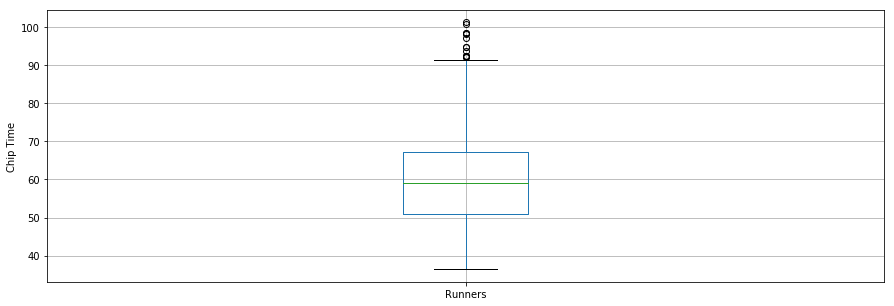

In [39]:
df7.boxplot(column='Runner Minutes')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

### Did the runners' finish times follow a normal distribution?

C:\Users\divya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


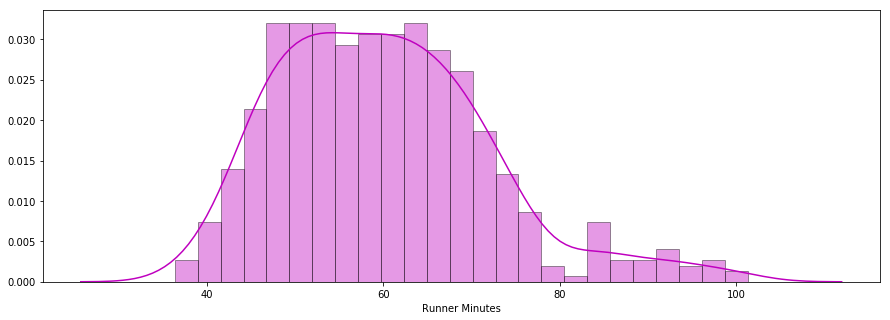

In [58]:
x = df7['Runner Minutes']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

### Whether there were any performance differences between males and females of various age groups?

C:\Users\divya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


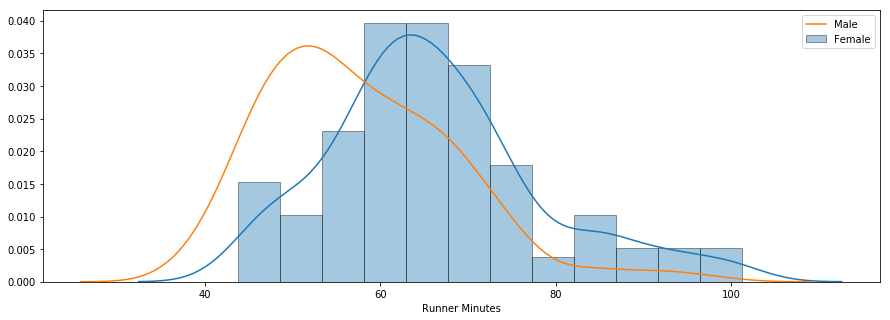

In [60]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner Minutes']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner Minutes']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

The distribution indicates that females were slower than males on average.<br> Let's use the groupby() method to compute summary statistics for males and females separately as shown below.

In [61]:
g_status = df7.groupby(" Gender", as_index=True).describe()
print(g_status)

        Runner Minutes                                                         \
                 count       mean        std        min        25%        50%   
 Gender                                                                         
 F               163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M               414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


### Observations & Conclusions: 
Average Time Taken by Females = 66 minutes<br>
Average Time Taken by Males = 58 minutes<br><br>
Now, let's show this visually, using a <b>Boxplot</b>

Text(0.5,0.98,'')

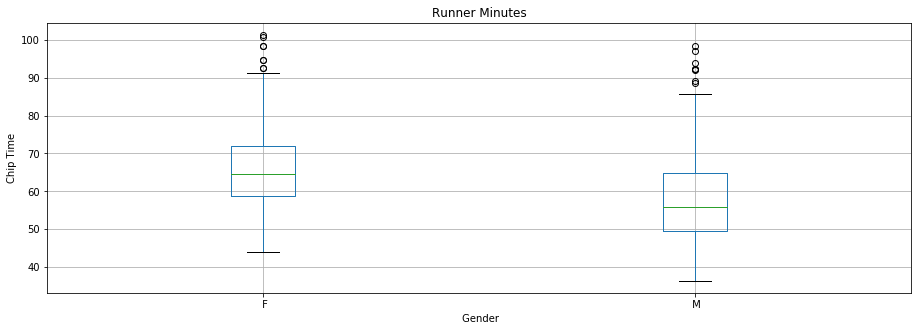

In [63]:
df7.boxplot(column='Runner Minutes', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")